# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
df=pd.read_csv('data.csv')

In [69]:
df

,origin,destination,company,departure,arrival,duration,price,date,class
0,BOM,DEL,IndiGo,08:30,10:25,1h 55m,"6,153",14-02-2022,Economy
1,BOM,DEL,IndiGo,07:45,09:50,2h 05m,"5,943",14-02-2022,Economy
2,BOM,DEL,Vistara,12:25,14:30,2h 05m,"6,249",14-02-2022,Economy
3,BOM,DEL,IndiGo,10:05,12:15,2h 10m,"5,943",14-02-2022,Economy
4,BOM,DEL,IndiGo,13:40,15:50,2h 10m,"5,943",14-02-2022,Economy
...,...,...,...,...,...,...,...,...,...
2902,BOM,MAA,Vistara,17:50,19:55,2h 05m,"1,976",28-02-2022,Economy
2903,BOM,MAA,Vistara,21:00,23:05,2h 05m,"1,976",28-02-2022,Economy
2904,BOM,MAA,IndiGo,19:30,21:35,2h 05m,"1,890",28-02-2022,Economy
2905,BOM,MAA,Go First,20:15,22:20,2h 05m,"1,888",28-02-2022,Economy


In [70]:
df.columns

Index(['origin', 'destination', 'company', 'departure', 'arrival', 'duration',
       'price', 'date', 'class'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   origin       2907 non-null   object
 1   destination  2907 non-null   object
 2   company      2907 non-null   object
 3   departure    2907 non-null   object
 4   arrival      2907 non-null   object
 5   duration     2907 non-null   object
 6   price        2907 non-null   object
 7   date         2907 non-null   object
 8   class        2907 non-null   object
dtypes: object(9)
memory usage: 204.5+ KB


In [72]:
df['duration'].value_counts()

2h 10m    452
2h 15m    365
2h 05m    286
1h 50m    230
1h 55m    197
1h 45m    188
2h        167
1h 40m    153
1h 35m    141
2h 20m    120
1h 30m     98
1h 20m     89
2h 50m     80
2h 30m     56
2h 35m     52
2h 45m     51
2h 40m     49
2h 25m     34
3h         29
1h 25m     26
2h 55m     22
3h 10m     13
3h 05m      9
Name: duration, dtype: int64

In [73]:
df.isnull().sum()

origin         0
destination    0
company        0
departure      0
arrival        0
duration       0
price          0
date           0
class          0
dtype: int64

# EDA

In [74]:
df["day"]=pd.to_datetime(df.date,format="%d-%m-%Y").dt.day

In [75]:
df["month"]=pd.to_datetime(df.date,format="%d-%m-%Y").dt.month

In [76]:
df.drop(['date'],axis=1,inplace=True)

In [77]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["departure"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["departure"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["departure"], axis = 1, inplace = True)

In [78]:
df

,origin,destination,company,arrival,duration,price,class,day,month,Dep_hour,Dep_min
0,BOM,DEL,IndiGo,10:25,1h 55m,"6,153",Economy,14,2,8,30
1,BOM,DEL,IndiGo,09:50,2h 05m,"5,943",Economy,14,2,7,45
2,BOM,DEL,Vistara,14:30,2h 05m,"6,249",Economy,14,2,12,25
3,BOM,DEL,IndiGo,12:15,2h 10m,"5,943",Economy,14,2,10,5
4,BOM,DEL,IndiGo,15:50,2h 10m,"5,943",Economy,14,2,13,40
...,...,...,...,...,...,...,...,...,...,...,...
2902,BOM,MAA,Vistara,19:55,2h 05m,"1,976",Economy,28,2,17,50
2903,BOM,MAA,Vistara,23:05,2h 05m,"1,976",Economy,28,2,21,0
2904,BOM,MAA,IndiGo,21:35,2h 05m,"1,890",Economy,28,2,19,30
2905,BOM,MAA,Go First,22:20,2h 05m,"1,888",Economy,28,2,20,15


In [79]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arr_hour"] = pd.to_datetime(df.arrival).dt.hour

# Extracting Minutes
df["Arr_min"] = pd.to_datetime(df.arrival).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["arrival"], axis = 1, inplace = True)

In [80]:
df

,origin,destination,company,duration,price,class,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,BOM,DEL,IndiGo,1h 55m,"6,153",Economy,14,2,8,30,10,25
1,BOM,DEL,IndiGo,2h 05m,"5,943",Economy,14,2,7,45,9,50
2,BOM,DEL,Vistara,2h 05m,"6,249",Economy,14,2,12,25,14,30
3,BOM,DEL,IndiGo,2h 10m,"5,943",Economy,14,2,10,5,12,15
4,BOM,DEL,IndiGo,2h 10m,"5,943",Economy,14,2,13,40,15,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2902,BOM,MAA,Vistara,2h 05m,"1,976",Economy,28,2,17,50,19,55
2903,BOM,MAA,Vistara,2h 05m,"1,976",Economy,28,2,21,0,23,5
2904,BOM,MAA,IndiGo,2h 05m,"1,890",Economy,28,2,19,30,21,35
2905,BOM,MAA,Go First,2h 05m,"1,888",Economy,28,2,20,15,22,20


In [81]:
#Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration=list(df['duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hour=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [82]:
df["Deu_hours"]=duration_hour
df["Deu_mins"]=duration_mins

In [83]:
df

,origin,destination,company,duration,price,class,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins
0,BOM,DEL,IndiGo,1h 55m,"6,153",Economy,14,2,8,30,10,25,1,55
1,BOM,DEL,IndiGo,2h 05m,"5,943",Economy,14,2,7,45,9,50,2,5
2,BOM,DEL,Vistara,2h 05m,"6,249",Economy,14,2,12,25,14,30,2,5
3,BOM,DEL,IndiGo,2h 10m,"5,943",Economy,14,2,10,5,12,15,2,10
4,BOM,DEL,IndiGo,2h 10m,"5,943",Economy,14,2,13,40,15,50,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,BOM,MAA,Vistara,2h 05m,"1,976",Economy,28,2,17,50,19,55,2,5
2903,BOM,MAA,Vistara,2h 05m,"1,976",Economy,28,2,21,0,23,5,2,5
2904,BOM,MAA,IndiGo,2h 05m,"1,890",Economy,28,2,19,30,21,35,2,5
2905,BOM,MAA,Go First,2h 05m,"1,888",Economy,28,2,20,15,22,20,2,5


In [84]:
df.drop(["duration"],axis=1,inplace=True)

In [85]:
df.head()

,origin,destination,company,price,class,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins
0,BOM,DEL,IndiGo,"6,153",Economy,14,2,8,30,10,25,1,55
1,BOM,DEL,IndiGo,"5,943",Economy,14,2,7,45,9,50,2,5
2,BOM,DEL,Vistara,"6,249",Economy,14,2,12,25,14,30,2,5
3,BOM,DEL,IndiGo,"5,943",Economy,14,2,10,5,12,15,2,10
4,BOM,DEL,IndiGo,"5,943",Economy,14,2,13,40,15,50,2,10


## converting data type of price from object to int

In [87]:
df['price']=df["price"].str.replace(",","")

In [88]:
df

,origin,destination,company,price,class,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins
0,BOM,DEL,IndiGo,6153,Economy,14,2,8,30,10,25,1,55
1,BOM,DEL,IndiGo,5943,Economy,14,2,7,45,9,50,2,5
2,BOM,DEL,Vistara,6249,Economy,14,2,12,25,14,30,2,5
3,BOM,DEL,IndiGo,5943,Economy,14,2,10,5,12,15,2,10
4,BOM,DEL,IndiGo,5943,Economy,14,2,13,40,15,50,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,BOM,MAA,Vistara,1976,Economy,28,2,17,50,19,55,2,5
2903,BOM,MAA,Vistara,1976,Economy,28,2,21,0,23,5,2,5
2904,BOM,MAA,IndiGo,1890,Economy,28,2,19,30,21,35,2,5
2905,BOM,MAA,Go First,1888,Economy,28,2,20,15,22,20,2,5


In [89]:
df['price'] =pd.to_numeric(df['price'])

In [90]:
print(df['price'].value_counts())

5943    100
6249     82
2201     77
5955     74
2124     72
       ... 
5838      1
8013      1
4703      1
5473      1
3835      1
Name: price, Length: 281, dtype: int64


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   origin       2907 non-null   object
 1   destination  2907 non-null   object
 2   company      2907 non-null   object
 3   price        2907 non-null   int64 
 4   class        2907 non-null   object
 5   day          2907 non-null   int64 
 6   month        2907 non-null   int64 
 7   Dep_hour     2907 non-null   int64 
 8   Dep_min      2907 non-null   int64 
 9   Arr_hour     2907 non-null   int64 
 10  Arr_min      2907 non-null   int64 
 11  Deu_hours    2907 non-null   int64 
 12  Deu_mins     2907 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 295.4+ KB


# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case


In [92]:
df['company'].value_counts()

IndiGo            976
Vistara           799
Go First          535
Air India         343
SpiceJet          150
AirAsia India     104
Name: company, dtype: int64

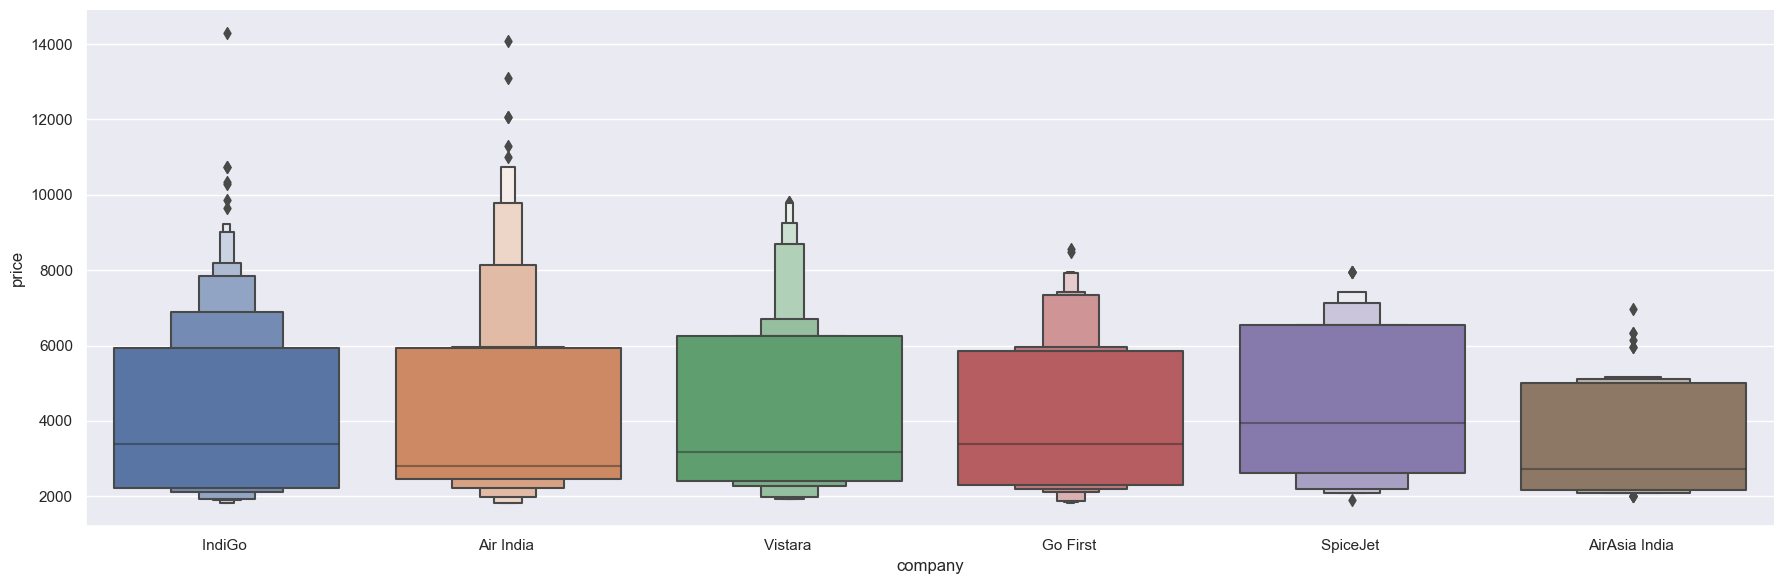

In [96]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "price", x = "company", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [97]:
company =df[["company"]]

company = pd.get_dummies(company, drop_first= True)

company.head()

,company_AirAsia India,company_Go First,company_IndiGo,company_SpiceJet,company_Vistara
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [99]:
df["origin"].value_counts()


BOM    1422
DEL     606
BLR     328
MAA     215
CCU     186
HYD     150
Name: origin, dtype: int64

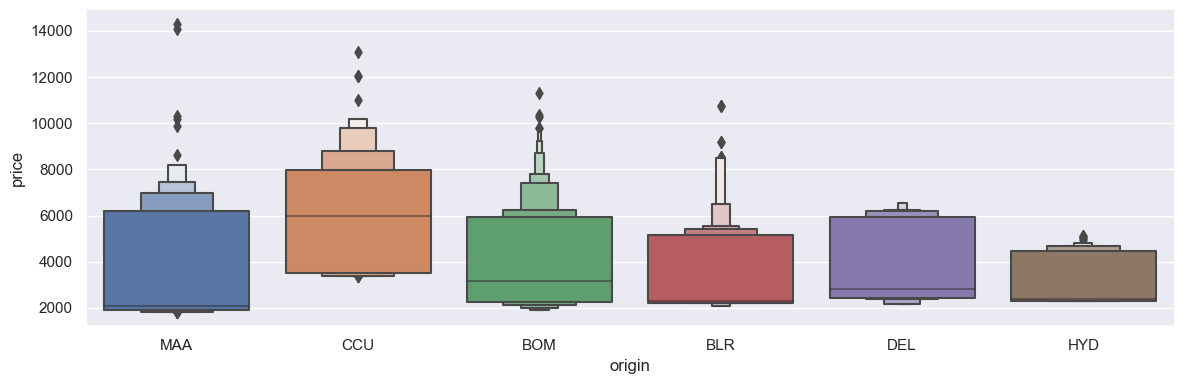

In [102]:
# origin vs Price

sns.catplot(y = "price", x = "origin", data =df.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [103]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

origin = df[["origin"]]

origin = pd.get_dummies(origin, drop_first= True)

origin.head()

,origin_BOM,origin_CCU,origin_DEL,origin_HYD,origin_MAA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [104]:
df["destination"].value_counts()

BOM    1485
DEL     559
BLR     315
MAA     219
CCU     181
HYD     148
Name: destination, dtype: int64

In [105]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

destination = df[["destination"]]

destination = pd.get_dummies(destination, drop_first = True)

destination.head()


,destination_BOM,destination_CCU,destination_DEL,destination_HYD,destination_MAA
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [111]:
from sklearn.preprocessing import LabelEncoder

In [106]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, company, origin, destination], axis = 1)

Economy    2907
Name: class, dtype: int64

In [109]:
df.drop(["company", "origin", "destination"], axis = 1, inplace = True)

In [110]:
df.head()

,price,class,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins,...,origin_BOM,origin_CCU,origin_DEL,origin_HYD,origin_MAA,destination_BOM,destination_CCU,destination_DEL,destination_HYD,destination_MAA
0,6153,Economy,14,2,8,30,10,25,1,55,...,1,0,0,0,0,0,0,1,0,0
1,5943,Economy,14,2,7,45,9,50,2,5,...,1,0,0,0,0,0,0,1,0,0
2,6249,Economy,14,2,12,25,14,30,2,5,...,1,0,0,0,0,0,0,1,0,0
3,5943,Economy,14,2,10,5,12,15,2,10,...,1,0,0,0,0,0,0,1,0,0
4,5943,Economy,14,2,13,40,15,50,2,10,...,1,0,0,0,0,0,0,1,0,0


In [119]:
df.drop(['class'],axis=1,inplace=True)

In [120]:
df

,price,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins,company_AirAsia India,...,origin_BOM,origin_CCU,origin_DEL,origin_HYD,origin_MAA,destination_BOM,destination_CCU,destination_DEL,destination_HYD,destination_MAA
0,6153,14,2,8,30,10,25,1,55,0,...,1,0,0,0,0,0,0,1,0,0
1,5943,14,2,7,45,9,50,2,5,0,...,1,0,0,0,0,0,0,1,0,0
2,6249,14,2,12,25,14,30,2,5,0,...,1,0,0,0,0,0,0,1,0,0
3,5943,14,2,10,5,12,15,2,10,0,...,1,0,0,0,0,0,0,1,0,0
4,5943,14,2,13,40,15,50,2,10,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,1976,28,2,17,50,19,55,2,5,0,...,1,0,0,0,0,0,0,0,0,1
2903,1976,28,2,21,0,23,5,2,5,0,...,1,0,0,0,0,0,0,0,0,1
2904,1890,28,2,19,30,21,35,2,5,0,...,1,0,0,0,0,0,0,0,0,1
2905,1888,28,2,20,15,22,20,2,5,0,...,1,0,0,0,0,0,0,0,0,1


In [122]:
df.shape

(2907, 24)

In [124]:
df.columns

Index(['price', 'day', 'month', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Deu_hours', 'Deu_mins', 'company_AirAsia India ', 'company_Go First ',
       'company_IndiGo ', 'company_SpiceJet ', 'company_Vistara ',
       'origin_BOM', 'origin_CCU', 'origin_DEL', 'origin_HYD', 'origin_MAA',
       'destination_BOM', 'destination_CCU', 'destination_DEL',
       'destination_HYD', 'destination_MAA'],
      dtype='object')

In [125]:
x=df.iloc[:,1:]

In [126]:
x

,day,month,Dep_hour,Dep_min,Arr_hour,Arr_min,Deu_hours,Deu_mins,company_AirAsia India,company_Go First,...,origin_BOM,origin_CCU,origin_DEL,origin_HYD,origin_MAA,destination_BOM,destination_CCU,destination_DEL,destination_HYD,destination_MAA
0,14,2,8,30,10,25,1,55,0,0,...,1,0,0,0,0,0,0,1,0,0
1,14,2,7,45,9,50,2,5,0,0,...,1,0,0,0,0,0,0,1,0,0
2,14,2,12,25,14,30,2,5,0,0,...,1,0,0,0,0,0,0,1,0,0
3,14,2,10,5,12,15,2,10,0,0,...,1,0,0,0,0,0,0,1,0,0
4,14,2,13,40,15,50,2,10,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,28,2,17,50,19,55,2,5,0,0,...,1,0,0,0,0,0,0,0,0,1
2903,28,2,21,0,23,5,2,5,0,0,...,1,0,0,0,0,0,0,0,0,1
2904,28,2,19,30,21,35,2,5,0,0,...,1,0,0,0,0,0,0,0,0,1
2905,28,2,20,15,22,20,2,5,0,1,...,1,0,0,0,0,0,0,0,0,1


In [129]:
y=df.iloc[:,0]

In [130]:
y

0       6153
1       5943
2       6249
3       5943
4       5943
        ... 
2902    1976
2903    1976
2904    1890
2905    1888
2906    2194
Name: price, Length: 2907, dtype: int64

In [138]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [139]:
print(selection.feature_importances_)

[7.43599065e-01 0.00000000e+00 6.36128928e-03 6.86966314e-03
 6.45126035e-03 6.78132940e-03 2.27334483e-02 1.71937456e-02
 5.64602841e-04 1.83358637e-03 1.08872851e-02 2.59315886e-03
 7.46859876e-03 1.96102058e-03 7.29898661e-02 9.37010939e-03
 3.33073837e-03 1.39631030e-02 1.89214776e-03 3.93008450e-02
 6.78940026e-03 3.45512619e-03 1.36106099e-02]


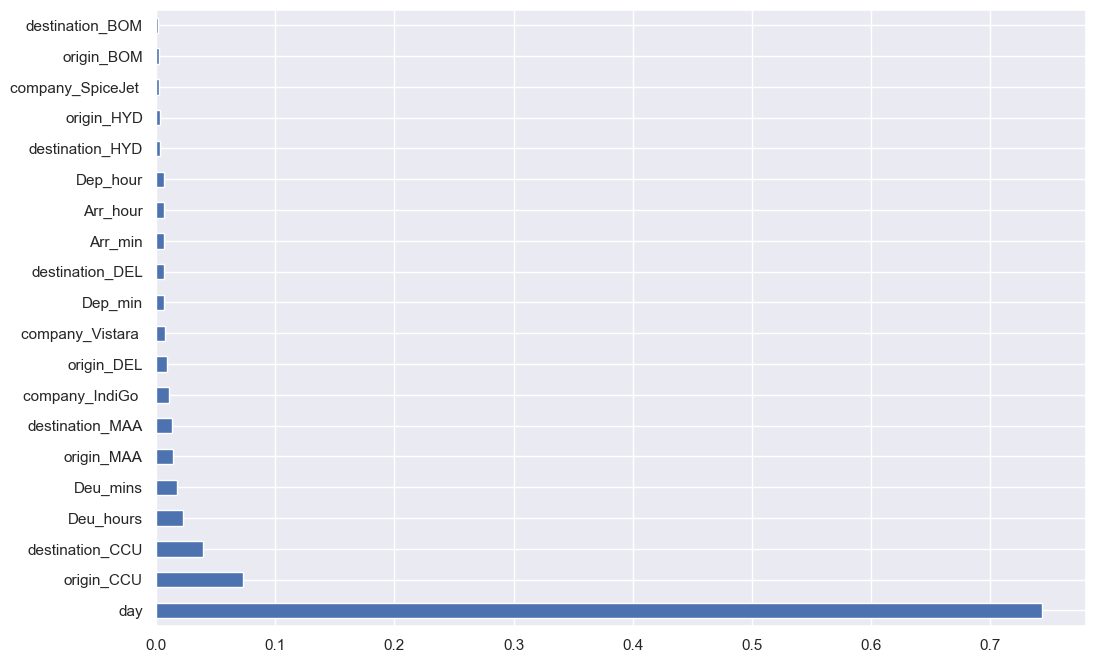

In [140]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Fitting model using Random Forest


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [142]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(xtrain, ytrain)


RandomForestRegressor()

In [144]:
ypred = reg_rf.predict(xtest)

In [146]:
reg_rf.score(xtrain, ytrain)

0.9914947210095797

In [147]:
reg_rf.score(xtest, ytest)

0.9209850907331355

/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


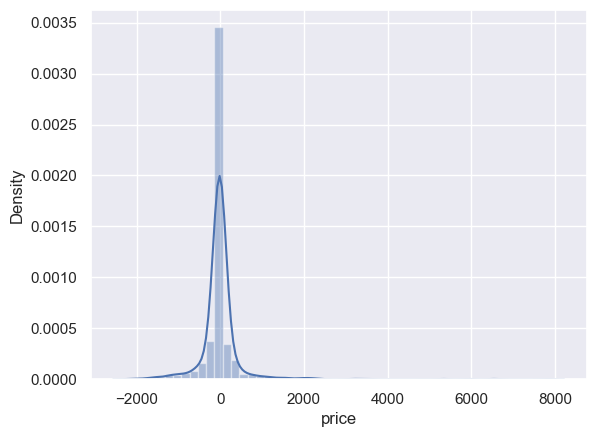

In [148]:
sns.distplot(ytest-ypred)
plt.show()

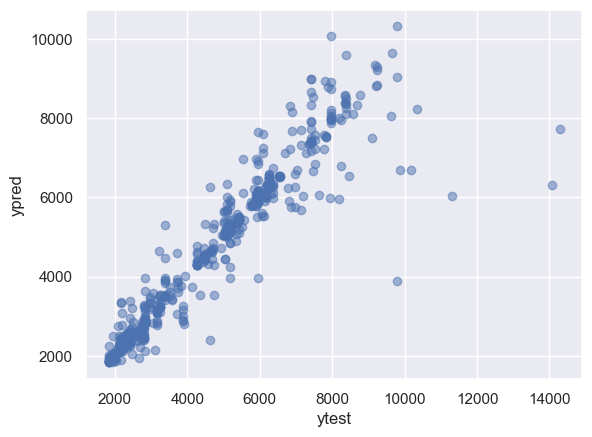

In [150]:
plt.scatter(ytest, ypred, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

In [151]:
from sklearn import metrics

In [152]:
print('MAE:', metrics.mean_absolute_error(ytest, ypred))
print('MSE:', metrics.mean_squared_error(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE: 205.4900824652778
MSE: 338884.4580430346
RMSE: 582.137834230893


In [153]:
metrics.r2_score(ytest, ypred)

0.9209850907331355

# Hyperparameter Tuning


In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [155]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [156]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [157]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [158]:
rf_random.fit(xtrain,ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.4s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.2s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.2s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=5, max_feat

/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.6s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.6s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.6s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.6s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.6s


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [159]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [160]:
prediction = rf_random.predict(xtest)


/Users/prasantpoudel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


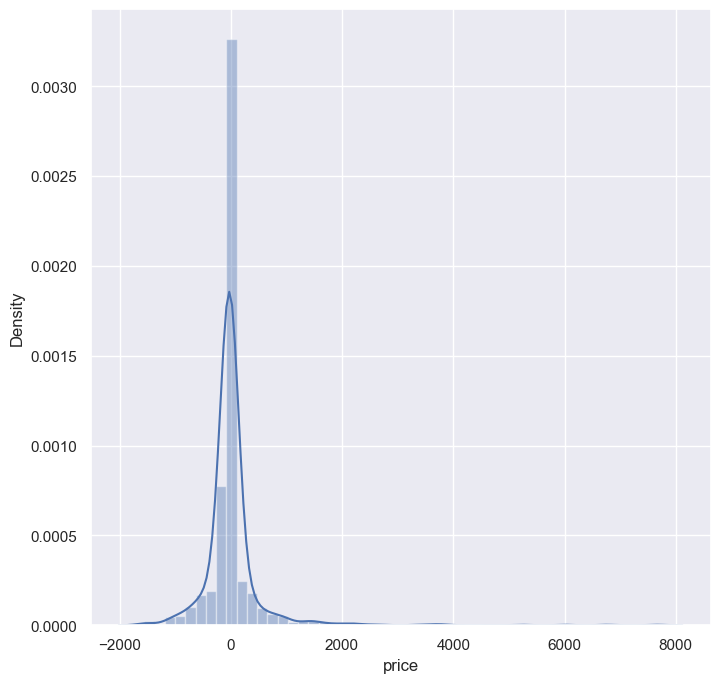

In [161]:
plt.figure(figsize = (8,8))
sns.distplot(ytest-prediction)
plt.show()

<Figure size 800x800 with 0 Axes>

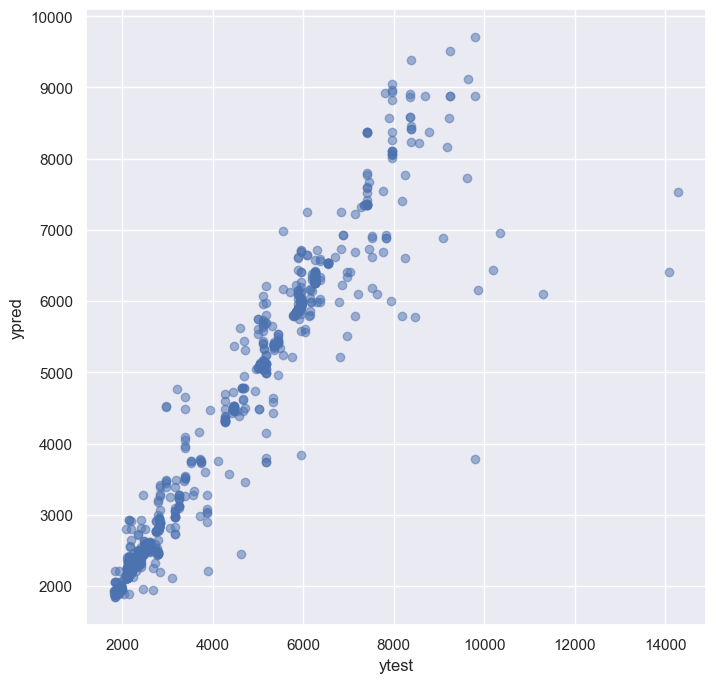

In [163]:
plt.figure(figsize = (8,8))
plt.scatter(ytest, prediction, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()


In [164]:
print('MAE:', metrics.mean_absolute_error(ytest, prediction))
print('MSE:', metrics.mean_squared_error(ytest, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, prediction)))

MAE: 228.87501893942846
MSE: 363958.8604953227
RMSE: 603.2900301640353


# Save the model to reuse it again


In [167]:
import pickle
pickle.dump(reg_rf,open('flight.pkl','wb'))

In [172]:
pickle.dump(rf_random,open('flight_cus.pkl','wb'))

In [170]:
yprediction = rf_random.predict(xtest)

In [171]:
metrics.r2_score(ytest, yprediction)

0.9151386979946501